In [1]:
import tensorflow as tf

fminst = tf.keras.datasets.fashion_mnist

In [2]:
# Dividir el conjunto de datos en entrenamiento y test.
(training_images, training_labels), (test_images, test_labels) = fminst.load_data()

In [3]:
# Normalización
training_images, test_images = training_images / 255, test_images / 255

In [4]:
# Arquitectura del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [5]:
# Compilar el modelo
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [6]:
# Entrenar al modelo
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5001 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3757 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3395 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3151 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.8911


In [7]:
# Evaluar el rendimiento del modelo con el conjunto de test
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3469 - accuracy: 0.8762


In [8]:
model = tf.keras.models.Sequential([
    # Parte convulocional
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [10]:
# Compilar el modelo
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# Entrenar el modelo
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4597 - accuracy: 0.8335
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3103 - accuracy: 0.8856
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2676 - accuracy: 0.9010
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2380 - accuracy: 0.9117
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2128 - accuracy: 0.9207


In [12]:
# Evaluar el rendimiento del modelo con el conjunto de test
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.9019


1/1 [==============================] - 0s 17ms/step


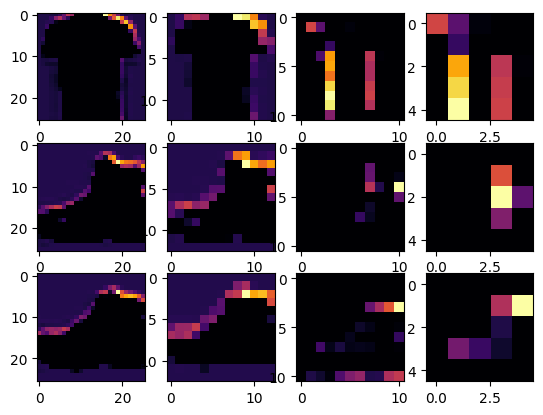

In [13]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3, 4)

first_image, second_image, third_image, = 85, 39, 28
convolution_number = 1

layers_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layers_outputs)

for x in range(0, 4):
    f1 = activation_model.predict(test_images[first_image].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, convolution_number], cmap = 'inferno')
    axarr[0, x].grid(False)

    f2 = activation_model.predict(test_images[second_image].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, convolution_number], cmap = 'inferno')
    axarr[1, x].grid(False)

    f3 = activation_model.predict(test_images[third_image].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, convolution_number], cmap = 'inferno')
    axarr[2, x].grid(False)